![The Harmony Project logo](https://raw.githubusercontent.com/harmonydata/brand/main/Logo/PNG/%D0%BB%D0%BE%D0%B3%D0%BE%20%D1%84%D1%83%D0%BB-05.png)

<a href="https://harmonydata.ac.uk"><span align="left">🌐 harmonydata.ac.uk</span></a>
<a href="https://github.com/harmonydata/harmony"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/github-mark.svg" alt="Harmony Python package | Github" width="21px"/></a>
<a href="https://www.linkedin.com/company/harmonydata"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/linkedin.svg" alt="Harmony | LinkedIn" width="21px"/></a>
<a href="https://twitter.com/harmony_data"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/x.svg" alt="Harmony | X" width="21px"/></a>
<a href="https://www.instagram.com/harmonydata/"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/instagram.svg" alt="Harmony | Instagram" width="21px"/></a>
<a href="https://www.facebook.com/people/Harmony-Project/100086772661697/"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/fb.svg" alt="Harmony | Facebook" width="21px"/></a>
<a href="https://www.youtube.com/channel/UCraLlfBr0jXwap41oQ763OQ"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/yt.svg" alt="Harmony | YouTube" width="21px"/></a>

# Harmony walkthrough - Python library

You can run this notebook in Google Colab: <a href="https://colab.research.google.com/github/harmonydata/harmony/blob/main/Harmony_example_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how you can use Harmony to find the similarity matrix between two questionnaires from Harmony's database, and a third questionnaire which you input here (Norwegian GAD-7).

Harmony is a data harmonisation tool that uses natural language
processing to recognise where questions in questionnaires are semantically similar. Harmony is a collaboration project between [Ulster University](https://ulster.ac.uk/), [University College London](https://ucl.ac.uk/), the [Universidade Federal de Santa Maria](https://www.ufsm.br/), and [Fast Data Science](http://fastdatascience.com/).  Harmony is funded by [Wellcome](https://wellcome.org/) as part of the [Wellcome Data Prize in Mental Health](https://wellcome.org/grant-funding/schemes/wellcome-mental-health-data-prize).

This walkthrough lets you compare items where questions have already been extracted from the PDFs. If you want to process PDFs, you also need to install
Java and [Apache Tika](https://tika.apache.org/) - see the Harmony README.

![my badge](https://badgen.net/badge/Status/In%20Development/orange)

[![PyPI package](https://img.shields.io/badge/pip%20install-harmonydata-brightgreen)](https://pypi.org/project/harmonydata/)


## Install the Harmony Python library from Pypi

In [1]:
!pip install harmonydata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

Also install Matplotlib because we would like to do some plots in this demo. But this is not generally needed for Harmony.

In [2]:
!pip install matplotlib

## Import the library and check the version

In [1]:
import harmony

/home/thomas/anaconda3/envs/harmony/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


What version of Harmony are we on?

In [2]:
harmony.__version__

'1.0.3'

In [3]:
from harmony import create_instrument_from_list

gad_7_norwegian = create_instrument_from_list(["Følt deg nervøs, engstelig eller veldig stresset",
                   "Ikke klart å slutte å bekymre deg eller kontrolleren bekymringene dine"],
                  instrument_name="GAD-7 Norwegian")

In [4]:
instruments = [harmony.example_instruments["CES_D English"],
               harmony.example_instruments["GAD-7 Portuguese"],
               gad_7_norwegian]

In [5]:
match_response = harmony.match_instruments(instruments)

questions = match_response.questions
similarity = match_response.similarity_with_polarity

{"cluster_id": 0, "centroid_id": 19, "item_ids": [2, 19, 4], "text_description": "I could not get \u201cgoing.\u201d"}
{"cluster_id": 1, "centroid_id": 8, "item_ids": [6, 8, 1, 3], "text_description": "I thought my life had been a failure."}
{"cluster_id": 2, "centroid_id": 9, "item_ids": [9, 26, 10], "text_description": "I felt fearful."}
{"cluster_id": 3, "centroid_id": 11, "item_ids": [11, 15, 7], "text_description": "I was happy."}
{"cluster_id": 4, "centroid_id": 17, "item_ids": [17, 18, 13, 14, 5, 16], "text_description": "I felt sad."}
{"cluster_id": 5, "centroid_id": 20, "item_ids": [20, 25, 0, 12], "text_description": "Sentir-se nervoso/a, ansioso/a ou muito tenso/a"}
{"cluster_id": 6, "centroid_id": 28, "item_ids": [21, 28, 22], "text_description": "Ikke klart \u00e5 slutte \u00e5 bekymre deg eller kontrolleren bekymringene dine"}
{"cluster_id": 7, "centroid_id": 27, "item_ids": [24, 27, 23], "text_description": "F\u00f8lt deg nerv\u00f8s, engstelig eller veldig stresset"}


See the questions

In [6]:
for q in questions:
    print (q.question_text)

I was bothered by things that usually don’t bother me.
I did not feel like eating; my appetite was poor.
I felt that I could not shake off the blues even with help from my family or friends.
I felt I was just as good as other people.
I had trouble keeping my mind on what I was doing.
I felt depressed.
I felt that everything I did was an effort.
I felt hopeful about the future.
I thought my life had been a failure.
I felt fearful.
My sleep was restless.
I was happy.
I talked less than usual.
I felt lonely.
People were unfriendly.
I enjoyed life.
I had crying spells.
I felt sad.
I felt that people dislike me.
I could not get “going.”
Sentir-se nervoso/a, ansioso/a ou muito tenso/a
Não ser capaz de impedir ou de controlar as preocupações
Preocupar-se muito com diversas coisas
Dificuldade para relaxar
Ficar tão agitado/a que se torna difícil permanecer sentado/a
Ficar facilmente aborrecido/a ou irritado/a
Sentir medo como se algo horrível fosse acontecer
Følt deg nervøs, engstelig eller ve

See the similarity matrix

In [7]:
similarity

array([[ 1.        ,  0.31365012,  0.34323075, -0.26082835,  0.42788812,
         0.34054826, -0.3074893 , -0.18449381, -0.25914563,  0.31232795,
         0.28057174, -0.28101035,  0.48577076,  0.27214028, -0.28000391,
        -0.1989061 ,  0.2869449 ,  0.31094228,  0.37545969,  0.28829139,
         0.3378802 ,  0.44290323,  0.438708  , -0.26580206,  0.38783188,
         0.53001133,  0.25845853,  0.34834389,  0.4759781 ],
       [ 0.31365012,  1.        ,  0.32531283, -0.3844969 , -0.39382813,
        -0.43607551, -0.44434266, -0.23701803, -0.46996572, -0.36608222,
        -0.34493579, -0.2956176 ,  0.36299875,  0.38550648, -0.20762319,
        -0.30174485, -0.41118524, -0.42717949, -0.33941373,  0.37951923,
        -0.31706227,  0.11435868, -0.11078689, -0.19496468, -0.25027672,
        -0.14382353, -0.24803396, -0.29994106, -0.12476518],
       [ 0.34323075,  0.32531283,  1.        , -0.45727843,  0.36003788,
         0.44618645, -0.4240064 , -0.30709131, -0.40909897,  0.34075579,
  

## Plot the similarity matrix

In [8]:
import matplotlib.pyplot as plt

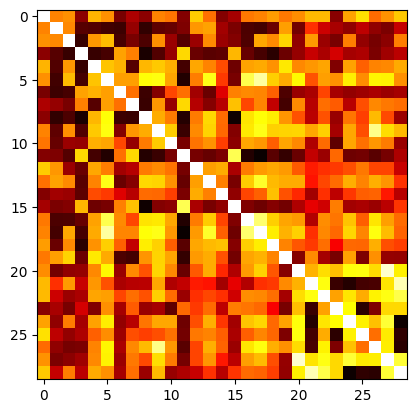

In [9]:
plt.imshow(similarity, cmap='hot', interpolation='nearest')

## Generate a crosswalk table

In [10]:
from harmony.matching.generate_crosswalk_table import generate_crosswalk_table

In [11]:
threshold = 0.6

In [12]:
df_crosswalk_table = generate_crosswalk_table(instruments, similarity, threshold, is_allow_within_instrument_matches = True, is_enforce_one_to_one = True)

In [13]:
df_crosswalk_table

,pair_name,question1_id,question1_text,question2_id,question2_text,match_score
0,GAD-7 Portuguese_1_GAD-7 Norwegian_1,GAD-7 Portuguese_1,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",GAD-7 Norwegian_1,"Følt deg nervøs, engstelig eller veldig stresset",0.926110
1,GAD-7 Portuguese_2_GAD-7 Norwegian_2,GAD-7 Portuguese_2,Não ser capaz de impedir ou de controlar as pr...,GAD-7 Norwegian_2,Ikke klart å slutte å bekymre deg eller kontro...,0.880754
2,CES_D English_6_CES_D English_18,CES_D English_6,I felt depressed.,CES_D English_18,I felt sad.,0.849691
3,CES_D English_10_GAD-7 Portuguese_7,CES_D English_10,I felt fearful.,GAD-7 Portuguese_7,Sentir medo como se algo horrível fosse acontecer,0.811445
4,CES_D English_12_CES_D English_16,CES_D English_12,I was happy.,CES_D English_16,I enjoyed life.,0.727979


## Cluster the questions

Display the clusters that come out of Harmony by default

In [14]:
for cluster in match_response.clusters:
    print (f"Cluster #{cluster.cluster_id}: {cluster.text_description}")
    for question in cluster.items:
        print ("\t", question.question_text)

Cluster #0: I could not get “going.”
	 I felt that I could not shake off the blues even with help from my family or friends.
	 I could not get “going.”
	 I had trouble keeping my mind on what I was doing.
Cluster #1: I thought my life had been a failure.
	 I felt that everything I did was an effort.
	 I thought my life had been a failure.
	 I did not feel like eating; my appetite was poor.
	 I felt I was just as good as other people.
Cluster #2: I felt fearful.
	 I felt fearful.
	 Sentir medo como se algo horrível fosse acontecer
	 My sleep was restless.
Cluster #3: I was happy.
	 I was happy.
	 I enjoyed life.
	 I felt hopeful about the future.
Cluster #4: I felt sad.
	 I felt sad.
	 I felt that people dislike me.
	 I felt lonely.
	 People were unfriendly.
	 I felt depressed.
	 I had crying spells.
Cluster #5: Sentir-se nervoso/a, ansioso/a ou muito tenso/a
	 Sentir-se nervoso/a, ansioso/a ou muito tenso/a
	 Ficar facilmente aborrecido/a ou irritado/a
	 I was bothered by things that u

# Call the k-means clustering algorithm

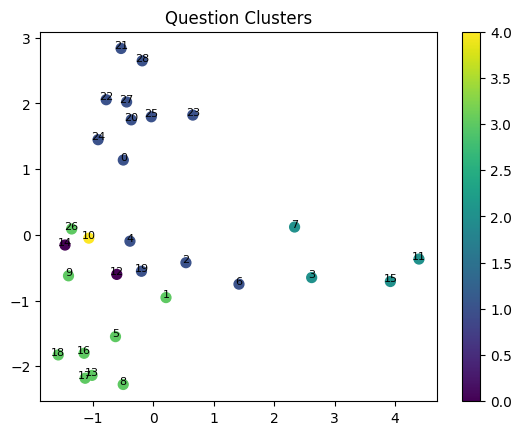

Score = 0.11848551034927368


,question_text,cluster_number
0,I was bothered by things that usually don’t bo...,1
1,I did not feel like eating; my appetite was poor.,3
2,I felt that I could not shake off the blues ev...,1
3,I felt I was just as good as other people.,2
4,I had trouble keeping my mind on what I was do...,1
5,I felt depressed.,3
6,I felt that everything I did was an effort.,1
7,I felt hopeful about the future.,2
8,I thought my life had been a failure.,3
9,I felt fearful.,3


In [15]:
from harmony import cluster_questions
df, score = cluster_questions(match_response.questions, num_clusters = 5, is_show_graph = True)

print (f"Score = {score}")

df

# Display the similarities between instruments

In [16]:
for similarity in match_response.instrument_to_instrument_similarities:
    print (f"F1 similarity of {similarity.instrument_1_name} to {similarity.instrument_2_name}:\t{similarity.f1}")

F1 similarity of CES_D English to GAD-7 Portuguese:	0.675
F1 similarity of CES_D English to GAD-7 Norwegian:	0.55
F1 similarity of GAD-7 Portuguese to GAD-7 Norwegian:	0.6428571428571428
